<a href="https://colab.research.google.com/github/miladlink/Beginner_Deep_Learning/blob/main/Cats%26DogsVGGnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
conv_base = VGG16 (weights = 'imagenet', include_top = False, input_shape = (150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
base_dir = '/content/drive/MyDrive/cats_and_dogs_small'

In [ ]:
train_dir = os.path.join (base_dir, 'train') #train_dir = f'{base_dir}/train'
valid_dir = os.path.join (base_dir, 'valid')
test_dir = os.path.join (base_dir, 'test')

In [ ]:
datagen = ImageDataGenerator (rescale = 1. / 255)
batch_size = 20

1. Extract Features

In [ ]:
def extract_features (directory, sample_count):
   features = np.zeros (shape = (sample_count, 4, 4, 512))
   labels = np.zeros (shape = (sample_count))
   generator = datagen.flow_from_directory (directory, target_size = (150, 150), batch_size = batch_size, class_mode= 'binary')
   i = 0
   for input_batch, labels_batch in generator:
      features_batch = conv_base.predict (input_batch)
      features [i * batch_size: (i + 1) * batch_size] = features_batch
      labels [i * batch_size: (i + 1) * batch_size] = labels_batch
      i += 1
      if i * batch_size >= sample_count:
         break
   return features, labels

In [ ]:
train_features, train_labels = extract_features (train_dir, 2000)
 
valid_features, valid_labels = extract_features (valid_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_features = np.reshape (train_features, (2000, 4 * 4 * 512))
valid_features = np.reshape (valid_features, (1000, 4 * 4 * 512))

In [ ]:
from keras.layers import Dropout
from keras.optimizers import RMSprop

In [ ]:
model = Sequential ()
model.add (Dense (256, activation = 'relu', input_dim = 4 * 4 * 512))
model.add (Dropout (0.5))
model.add (Dense (1, activation = 'sigmoid'))
model.compile (loss = 'binary_crossentropy', optimizer = RMSprop (lr = 2e-5), metrics = ['acc'])

In [ ]:
history = model.fit (train_features, train_labels, epochs = 30, batch_size = 20, validation_data = (valid_features, valid_labels))

Epoch 1/30
100/100 [==============================] - 1s 5ms/step - loss: 0.6962 - acc: 0.6037 - val_loss: 0.4361 - val_acc: 0.8430
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 0.4681 - acc: 0.7802 - val_loss: 0.3579 - val_acc: 0.8640
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3773 - acc: 0.8435 - val_loss: 0.3222 - val_acc: 0.8780
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3257 - acc: 0.8705 - val_loss: 0.2964 - val_acc: 0.8830
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2760 - acc: 0.8895 - val_loss: 0.2822 - val_acc: 0.8910
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2672 - acc: 0.8959 - val_loss: 0.2729 - val_acc: 0.8910
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2410 - acc: 0.9140 - val_loss: 0.2647 - val_acc: 0.8930
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.

In [ ]:
model.save ('cats_and_dogs_small_3.h5')

In [ ]:
acc = history.history ['acc']
val_acc = history.history ['val_acc']
 
loss = history.history ['loss']
val_loss = history.history ['val_loss']
 
epochs = range (1, len (acc) + 1)

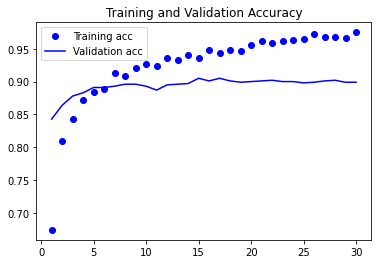

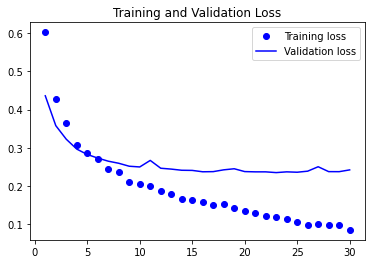

In [ ]:
plt.plot (epochs, acc, 'bo', label = 'Training acc')
plt.plot (epochs, val_acc, 'b', label = 'Validation acc')
plt.title ('Training and Validation Accuracy')
plt.legend ()
plt.figure ()
plt.plot (epochs, loss, 'bo', label = 'Training loss')
plt.plot (epochs, val_loss, 'b', label = 'Validation loss')
plt.legend ()
plt.title ('Training and Validation Loss')
plt.show ()

2. Data Tuning (freaze and augmentation)

In [ ]:
# data augmentation just for train
 
train_datagen = ImageDataGenerator (rescale = 1. / 255, rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')
test_datagen = ImageDataGenerator (rescale = 1. / 255)
 
train_generator = train_datagen.flow_from_directory (train_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')
valid_generator = test_datagen.flow_from_directory (valid_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model = Sequential ()
model.add (conv_base)
model.add (Flatten())
model.add (Dense (256, activation = 'relu'))
model.add (Dense (1, activation = 'sigmoid'))
model.compile (loss = 'binary_crossentropy', optimizer = RMSprop (lr = 2e-5), metrics = ['acc'])

In [ ]:
len (model.trainable_weights)

30

In [ ]:
conv_base.trainable = False
len (model.trainable_weights)

4

In [ ]:
history = model.fit (train_generator, steps_per_epoch = 66, epochs = 30, validation_data = valid_generator, validation_steps = 33)

Epoch 1/30
66/66 [==============================] - 21s 260ms/step - loss: 0.6055 - acc: 0.6399 - val_loss: 0.2249 - val_acc: 0.9061
Epoch 2/30
66/66 [==============================] - 17s 256ms/step - loss: 0.3089 - acc: 0.8797 - val_loss: 0.1849 - val_acc: 0.9182
Epoch 3/30
66/66 [==============================] - 17s 257ms/step - loss: 0.2827 - acc: 0.8860 - val_loss: 0.1785 - val_acc: 0.9258
Epoch 4/30
66/66 [==============================] - 17s 258ms/step - loss: 0.2143 - acc: 0.9177 - val_loss: 0.1010 - val_acc: 0.9591
Epoch 5/30
66/66 [==============================] - 17s 255ms/step - loss: 0.2015 - acc: 0.9163 - val_loss: 0.1608 - val_acc: 0.9242
Epoch 6/30
66/66 [==============================] - 17s 258ms/step - loss: 0.1856 - acc: 0.9180 - val_loss: 0.1944 - val_acc: 0.9333
Epoch 7/30
66/66 [==============================] - 17s 256ms/step - loss: 0.1790 - acc: 0.9300 - val_loss: 0.0933 - val_acc: 0.9561
Epoch 8/30
66/66 [==============================] - 17s 257ms/step - 

In [ ]:
model.save ('cats_and_dogs_small_4.h5')

In [ ]:
 acc = history.history ['acc']
val_acc = history.history ['val_acc']
 
loss = history.history ['loss']
val_loss = history.history ['val_loss']
 
epochs = range (1, len (acc) + 1)

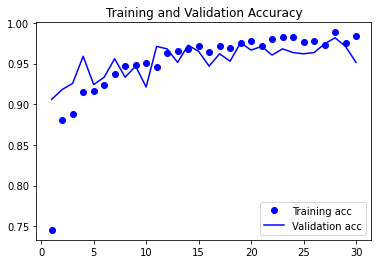

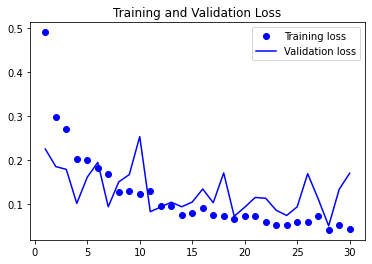

In [ ]:
 plt.plot (epochs, acc, 'bo', label = 'Training acc')
plt.plot (epochs, val_acc, 'b', label = 'Validation acc')
plt.title ('Training and Validation Accuracy')
plt.legend ()
plt.figure ()
plt.plot (epochs, loss, 'bo', label = 'Training loss')
plt.plot (epochs, val_loss, 'b', label = 'Validation loss')
plt.legend ()
plt.title ('Training and Validation Loss')
plt.show ()

3. five tuning

In [ ]:
# All previous acction repeated
 
net = Sequential ()
net.add (conv_base)
net.add (Flatten ())
net.add (Dense (256, activation = 'relu'))
net.add (Dense (1, activation = 'sigmoid'))
model.compile (loss ='binary_crossentropy', optimizer = RMSprop (lr = 1e-5), metrics = ['acc'])

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
   if layer.name == 'block5_conv1':
      set_trainable = True
   if set_trainable:
      layer.trainable = True
   else:
      layer.trainable = False

In [ ]:
len (net.trainable_weights)

10

In [ ]:
 history = model.fit (train_generator, steps_per_epoch = 66, epochs = 30, validation_data = valid_generator, validation_steps = 33)

Epoch 1/30
66/66 [==============================] - 15s 221ms/step - loss: 0.0451 - acc: 0.9833 - val_loss: 0.1430 - val_acc: 0.9652
Epoch 2/30
66/66 [==============================] - 14s 216ms/step - loss: 0.0284 - acc: 0.9932 - val_loss: 0.0988 - val_acc: 0.9652
Epoch 3/30
66/66 [==============================] - 14s 214ms/step - loss: 0.0367 - acc: 0.9866 - val_loss: 0.1457 - val_acc: 0.9621
Epoch 4/30
66/66 [==============================] - 14s 215ms/step - loss: 0.0329 - acc: 0.9925 - val_loss: 0.1177 - val_acc: 0.9712
Epoch 5/30
66/66 [==============================] - 14s 216ms/step - loss: 0.0305 - acc: 0.9906 - val_loss: 0.1208 - val_acc: 0.9652
Epoch 6/30
66/66 [==============================] - 14s 213ms/step - loss: 0.0255 - acc: 0.9872 - val_loss: 0.0928 - val_acc: 0.9697
Epoch 7/30
66/66 [==============================] - 14s 213ms/step - loss: 0.0166 - acc: 0.9957 - val_loss: 0.1368 - val_acc: 0.9606
Epoch 8/30
66/66 [==============================] - 14s 214ms/step - 

In [ ]:
model.save ('cats_and_dogs_small_5.h5')

In [ ]:
 acc = history.history ['acc']
val_acc = history.history ['val_acc']
 
loss = history.history ['loss']
val_loss = history.history ['val_loss']
 
epochs = range (1, len (acc) + 1)

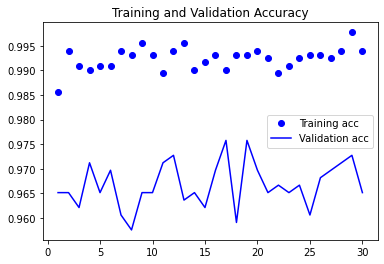

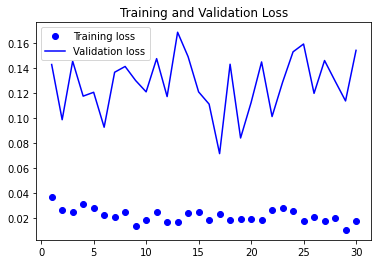

In [ ]:
 plt.plot (epochs, acc, 'bo', label = 'Training acc')
plt.plot (epochs, val_acc, 'b', label = 'Validation acc')
plt.title ('Training and Validation Accuracy')
plt.legend ()
plt.figure ()
plt.plot (epochs, loss, 'bo', label = 'Training loss')
plt.plot (epochs, val_loss, 'b', label = 'Validation loss')
plt.legend ()
plt.title ('Training and Validation Loss')
plt.show ()